# CatLab Demo Notebook
This notebook loads the CatLab model from github and predicts the vector distance between a single image pair as well as the feature vector of an image. The code is intended for demonstration purposes - use batch predictions when working with multiple images.

In [ ]:
!python --version

Python 3.10.12


In [ ]:
import os
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np
from io import BytesIO
import matplotlib.pyplot as plt

print("Using the following package versions:")
for package in [tf, np]:
    print(f"{package.__name__:<20}{package.__version__}")

Using the following package versions:
tensorflow          2.15.0
numpy               1.25.2


# Load model

In [ ]:
# The AI model and two example images are loaded from the github repository.
# If no folder exists at the following path, the repository is cloned there.
path_to_catlab_github_repository = "/content/catlab"

if not os.path.isdir(path_to_catlab_github_repository):
    print("Repository was not found at the given path. Cloning...")
    !git clone https://github.com/Leonard-P/Catlab.git $path_to_catlab_github_repository

catlab_model = tf.keras.models.load_model(
    os.path.join(path_to_catlab_github_repository, "catlab_model_2024"),
    compile=False)

# Load two example images to compute the vector distance.
image_paths = (os.path.join(path_to_catlab_github_repository, "example_images/same_cat/0.jpeg"),
    os.path.join(path_to_catlab_github_repository, "example_images/same_cat/1.jpeg"))

Repository was not found at the given path. Cloning...
Cloning into '/content/catlab'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 408 (delta 100), reused 187 (delta 92), pack-reused 210
Receiving objects: 100% (408/408), 55.52 MiB | 24.85 MiB/s, done.
Resolving deltas: 100% (183/183), done.


In [ ]:
def preprocess_image(image_path, display_image=False):
    """Prepare the image at the given image_path as model input. Preprocessing
    uses the imagenet dataset normalization values."""
    img = image.load_img(image_path, target_size=(224, 224), keep_aspect_ratio=True, interpolation="bicubic")
    img_array = image.img_to_array(img)

    if display_image:
        plt.imshow(img_array / 255.)
        plt.show()

    # Since we only predict a single image pair at a time for this demo, we
    # have to expand the array's dimension. If you have a batch of images, you
    # can feed the whole batch to the model for greater efficiency.
    img_array = np.expand_dims(img_array, axis=0)

    img_array = preprocess_input(img_array, mode="torch")
    return img_array

# Predict vector distance between two images

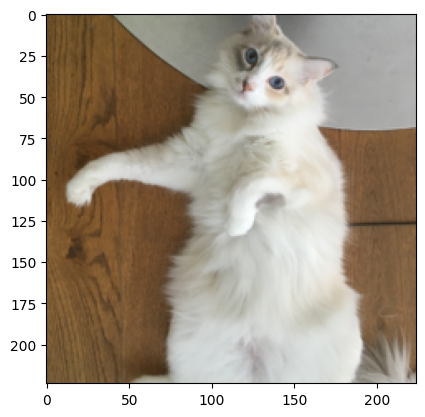

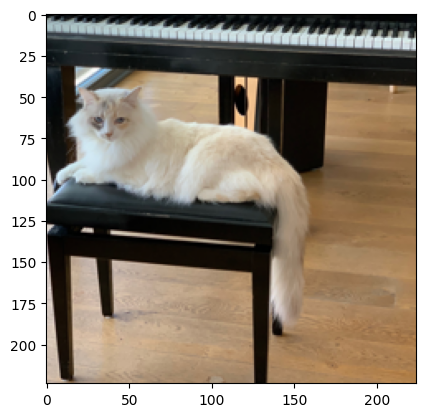

1/1 [==============================] - 3s 3s/step
vector_distance = 0.21487627923488617
same cat detected: True


In [ ]:
image_0 = preprocess_image(image_paths[0], display_image = True)
image_1 = preprocess_image(image_paths[1], display_image = True)

vector_distance = catlab_model.predict([image_0, image_1]).item()

print(f"{vector_distance = }")
print(f"same cat detected: {vector_distance < 0.412}")

# Predict feature vectors

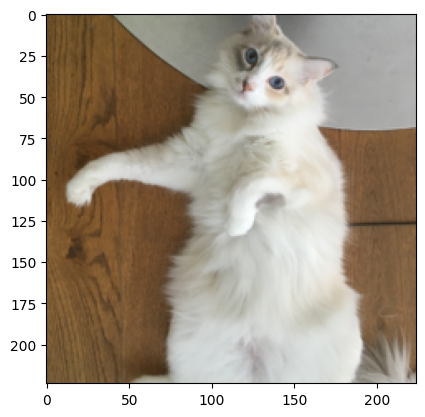

1/1 [==============================] - 1s 1s/step
feature_vector = array([[9.9948525e-01, 5.4242916e-04, 4.6684430e-04, 9.9951142e-01,
        9.9948895e-01, 4.3569249e-04, 4.9465813e-04, 5.2212802e-04,
        9.9942958e-01, 9.9950111e-01, 4.7135315e-04, 9.9945825e-01,
        9.6551180e-01, 9.9945712e-01, 4.9846747e-04, 4.9826456e-04,
        9.9951607e-01, 8.3644181e-01, 9.9954051e-01, 6.2041165e-04,
        5.1703682e-04, 5.9266043e-01, 5.3052016e-04, 9.9952143e-01,
        5.4135849e-04, 4.7965278e-04, 4.6876466e-04, 9.9944216e-01,
        4.5593811e-04, 4.9458462e-04, 9.9949163e-01, 5.3144916e-04,
        4.9500726e-04, 9.9962014e-01, 5.1202608e-04, 9.9952984e-01,
        4.6184906e-04, 9.9951279e-01, 4.9611490e-04, 4.9878377e-04,
        4.4863173e-04, 9.9959999e-01, 5.4829312e-04, 4.6674110e-04,
        9.9946350e-01, 4.1318787e-04, 9.9946332e-01, 9.9954081e-01,
        5.2343158e-04, 9.9951124e-01, 9.9952036e-01, 9.9942005e-01,
        4.1975430e-04, 5.2576669e-04, 4.9605110e-

In [ ]:
# Get one of the model's "twins" that predicts a feature vector
vector_model = catlab_model.layers[2]

img = preprocess_image(image_paths[0], display_image = True)

feature_vector = vector_model.predict(img)
print(f"{feature_vector = }")